In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9

def parser(time_data):
    return pd.datetime.strptime('2017-'+time_data,'%Y-%d-%m %H:%M:%S')
data = pd.read_csv('../data/namenode_1130-1212.csv',header=0,index_col=0, parse_dates=[0], date_parser=parser)

data = data.rename(columns={'cpu process':'top_cpu','memory process':'top_mem'})
data['top_cpu'] = data['top_cpu'].str.partition('/')[0]
data['top_mem'] = data['top_mem'].str.partition('/')[0]

Text(0.5,1,u'usr')

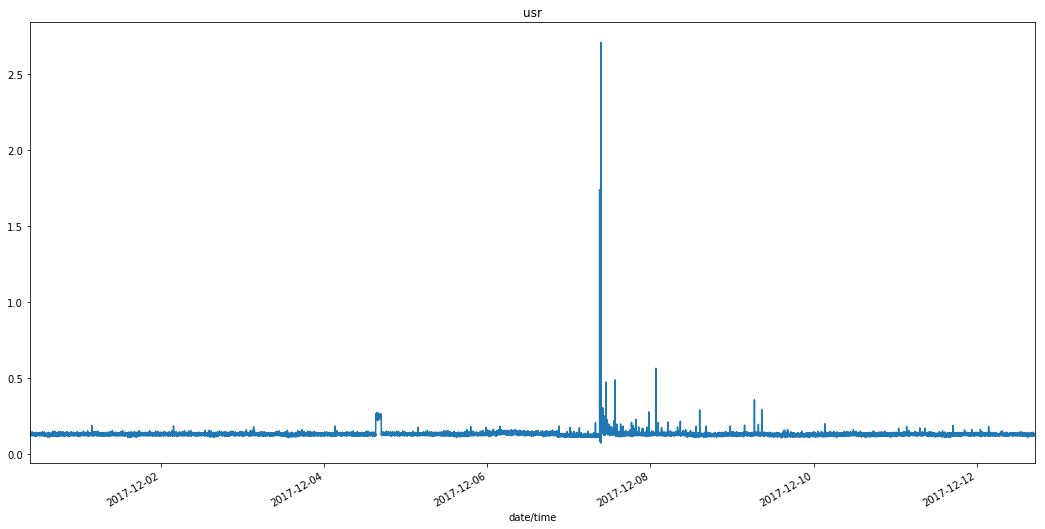

Text(0.5,1,u'sys')

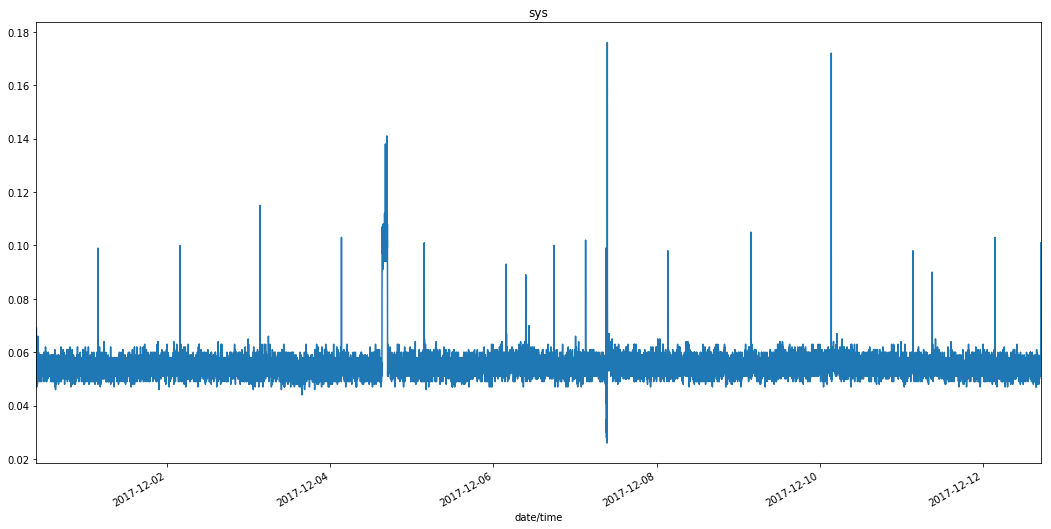

Text(0.5,1,u'used')

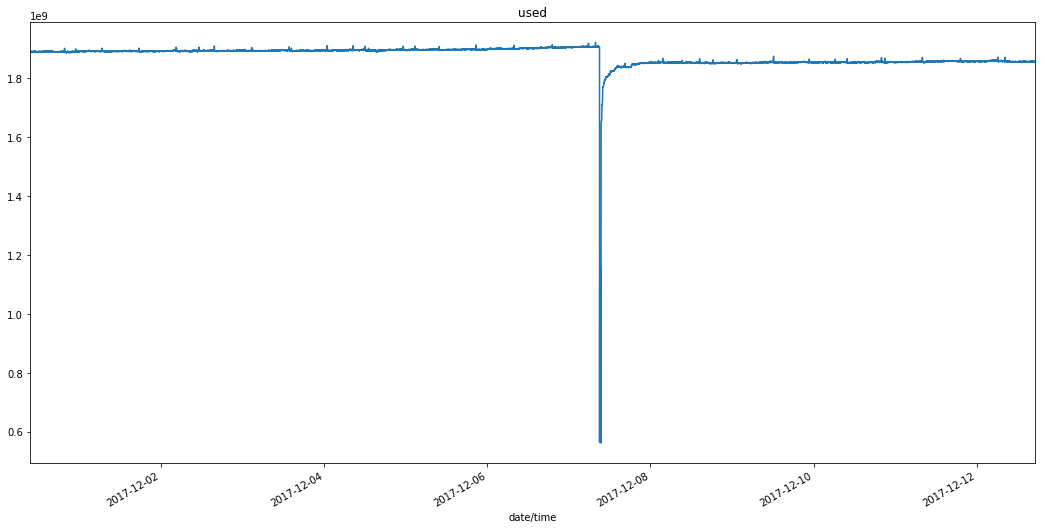

Text(0.5,1,u'buff')

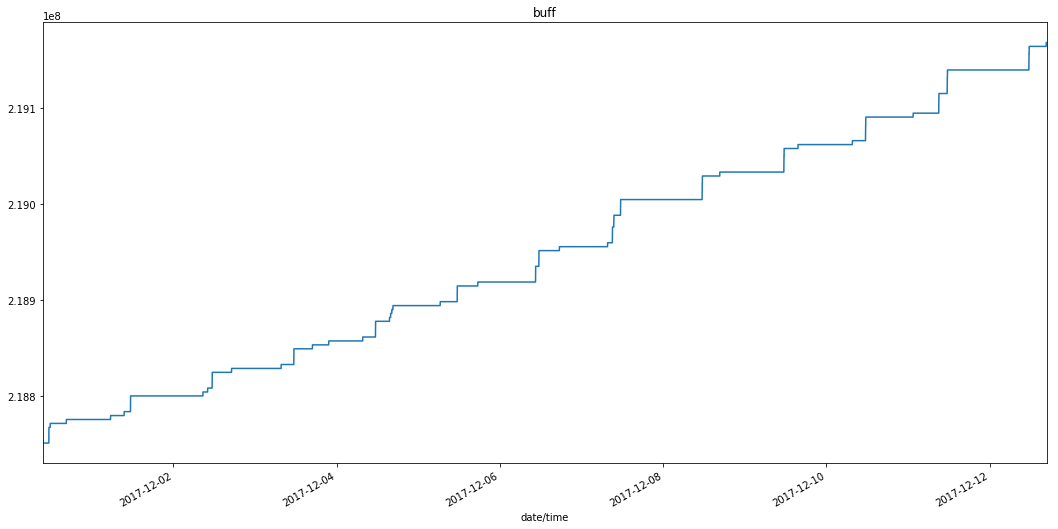

Text(0.5,1,u'cach')

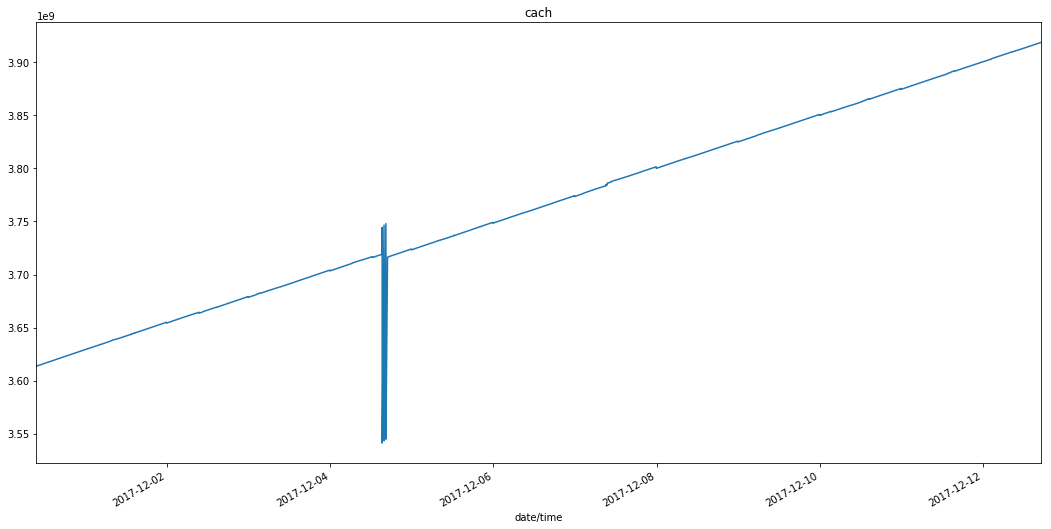

Text(0.5,1,u'free')

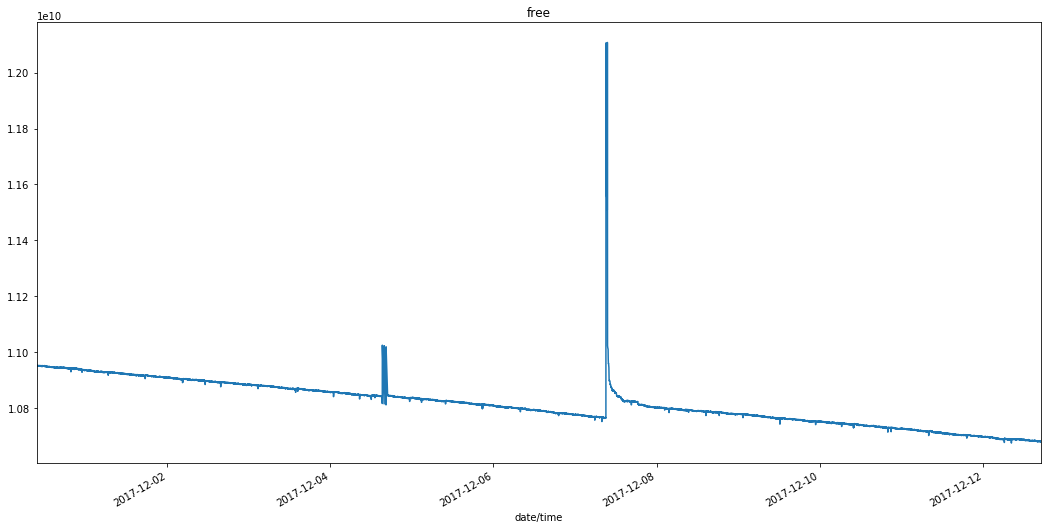

Text(0.5,1,u'recv')

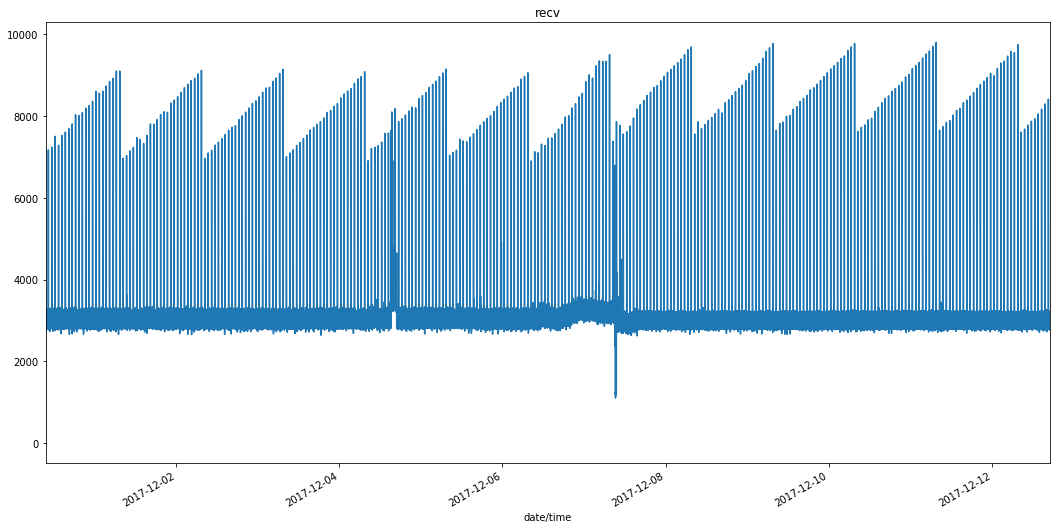

Text(0.5,1,u'send')

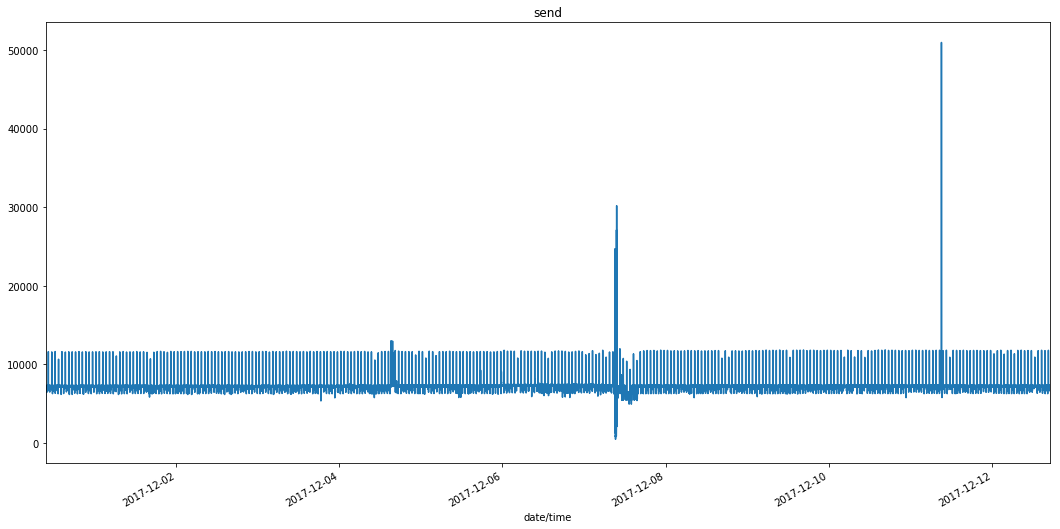

Text(0.5,1,u'read')

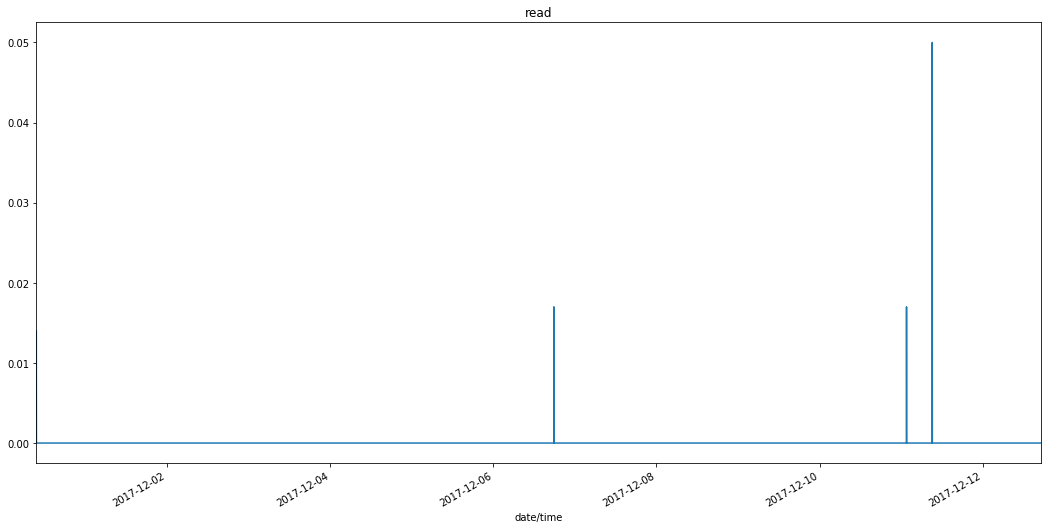

Text(0.5,1,u'writ')

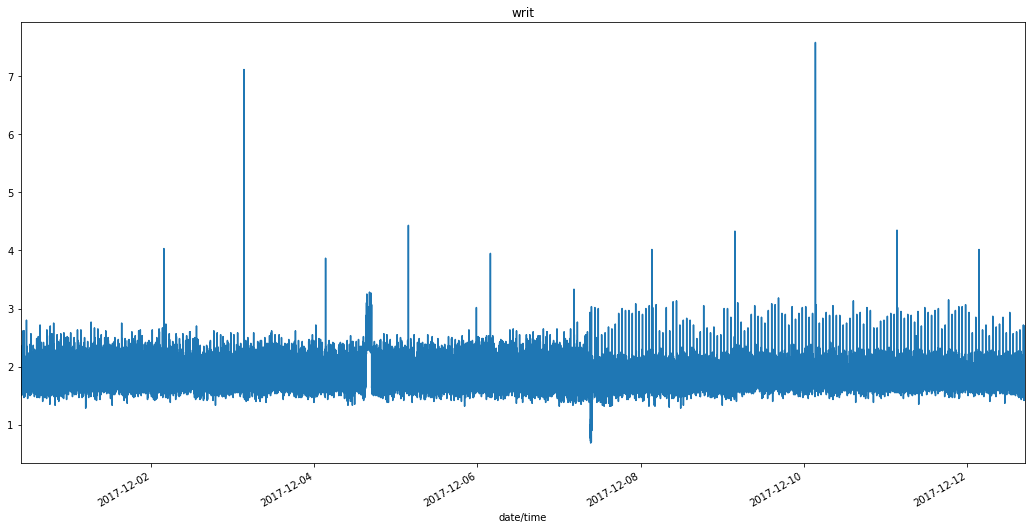

In [28]:
cols = ['usr', 'sys', 'used', 'buff', 'cach','free', 'recv', 'send', 'read', 'writ']
for col in cols:
    data[col].plot()
    plt.title(col)
    plt.show()

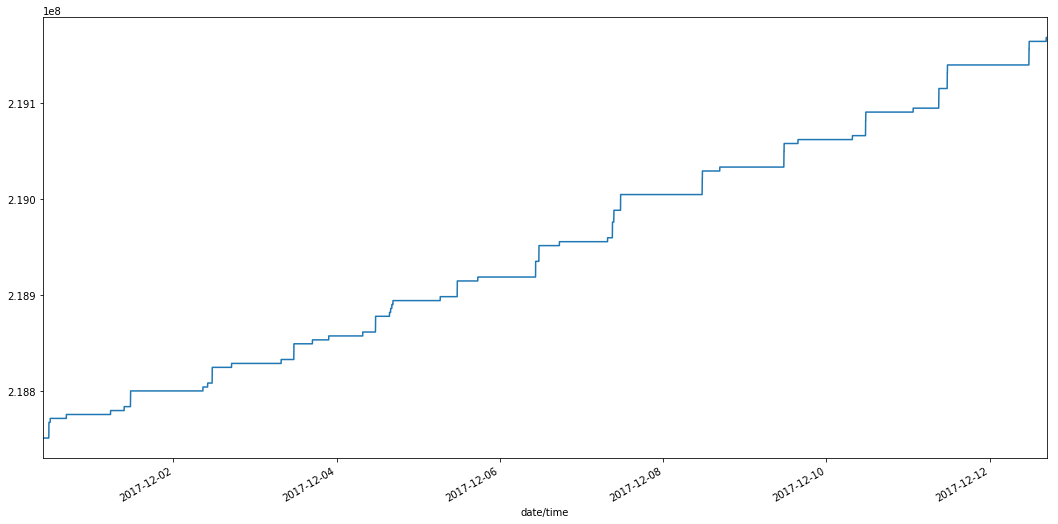

In [29]:
buff = data['buff']
buff.plot()
plt.show()

In [33]:
import requests
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [36]:
# normalize the dataset
scaler = preprocessing.MinMaxScaler()
buff['buff'] = scaler.fit_transform(buff.values.reshape(-1,1))

ValueError: setting an array element with a sequence.

## 检查平稳性

In [31]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24*60,center=False).mean() 
    rolstd = timeseries.rolling(window=24*60,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries.index.to_pydatetime(), timeseries.values, color='blue',label='Original')
    mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolstd.index.to_pydatetime(), rolstd.values, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [35]:
test_stationarity(buff['norm_buff'])

AttributeError: 'numpy.ndarray' object has no attribute 'rolling'